In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline
style.use('ggplot')


In [3]:
housing_df = pd.read_csv('USA_Housing.csv')

In [5]:
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [9]:
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

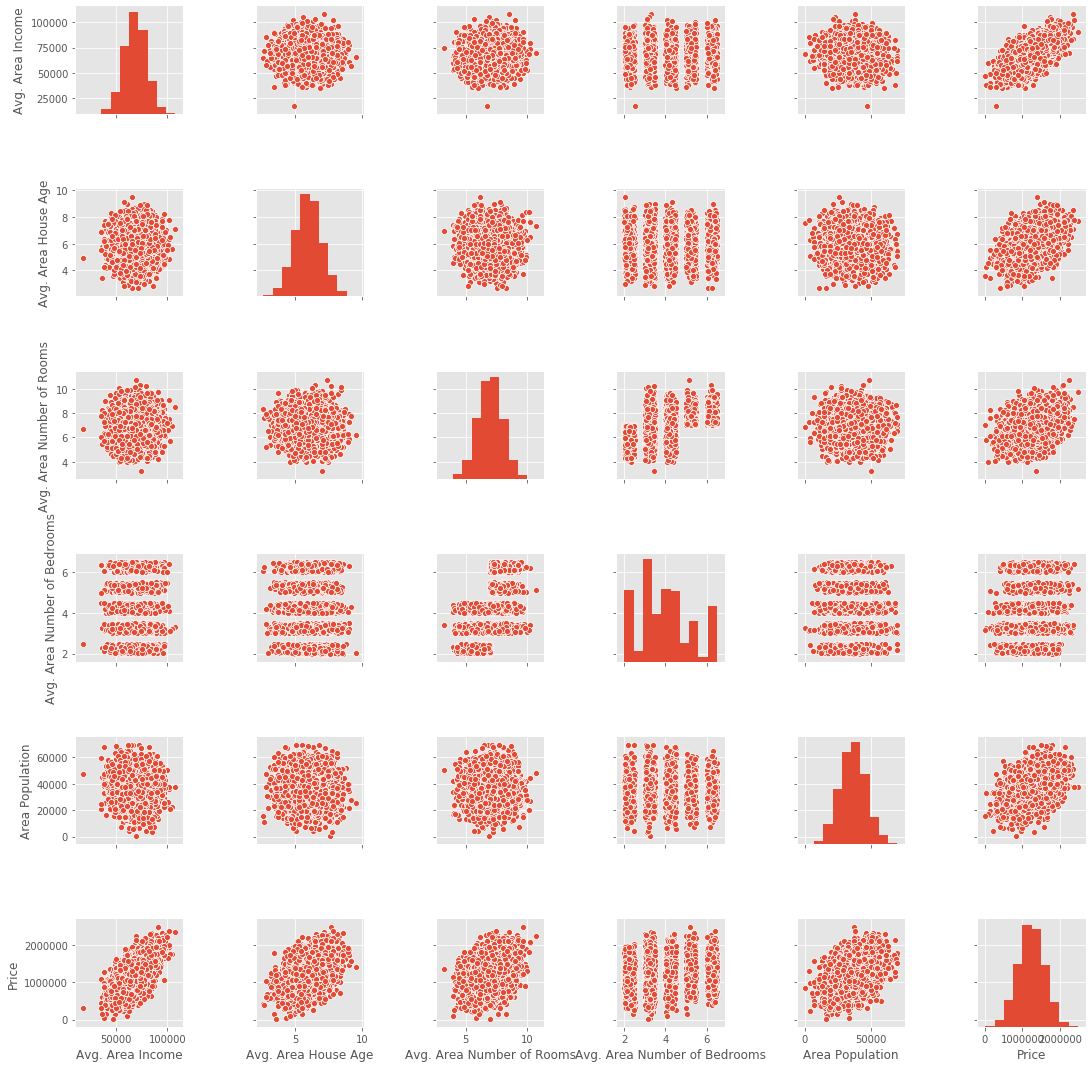

In [44]:
sns.pairplot(housing_df)

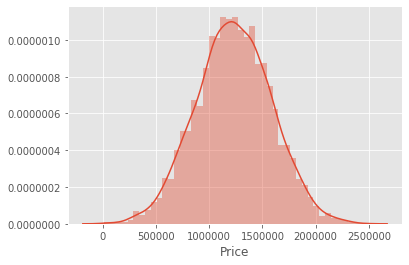

In [43]:
sns.distplot(housing_df['Price'])

In [15]:
housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


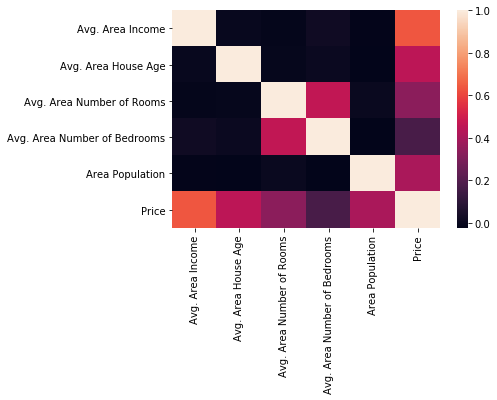

In [16]:
sns.heatmap(housing_df.corr())

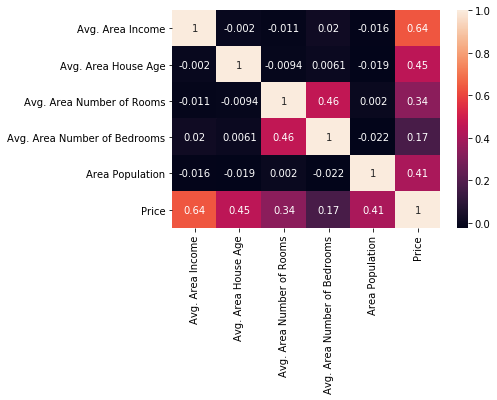

In [17]:
sns.heatmap(housing_df.corr(), annot=True)

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

In [18]:
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
X = housing_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [24]:
y = housing_df['Price']

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.intercept_

-2640159.796851911

In [31]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [34]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [35]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [36]:
predictions = lm.predict(X_test)

In [37]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [38]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

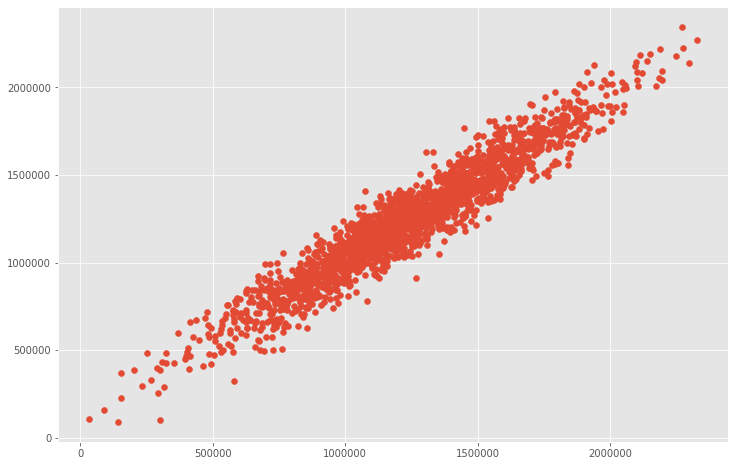

In [50]:
plt.figure(figsize=(12,8))

plt.scatter(y_test, predictions)

plt.show()

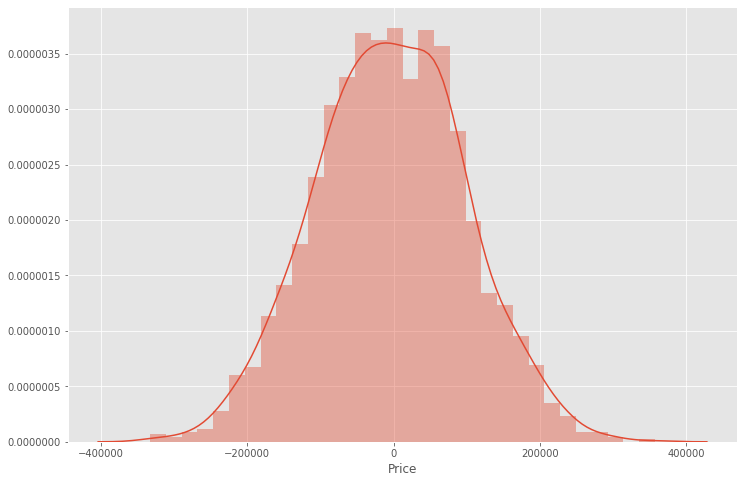

In [63]:
plt.figure(figsize=(12,8))

sns.distplot((y_test-predictions))

In [64]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [66]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209501

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291153